In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the dataset
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# to display statistical info about data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# to display basic info of datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# check for null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# deleting all the rows that have null values
df.dropna(inplace=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

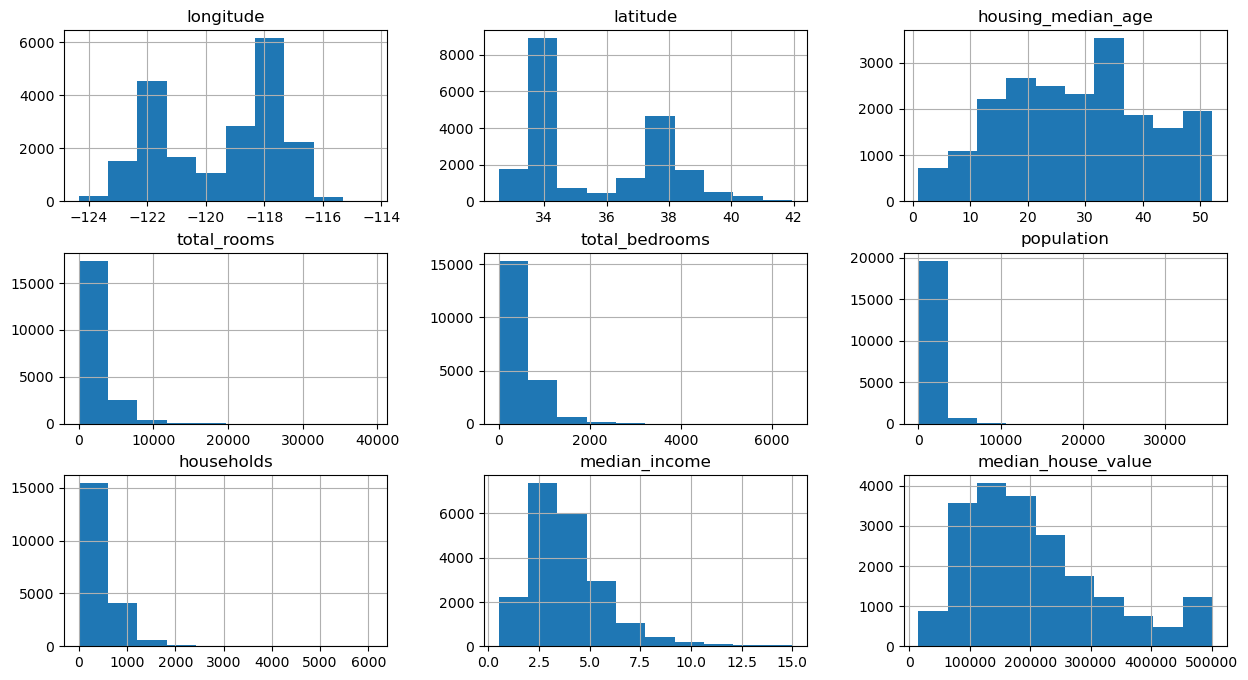

In [8]:
# histograms
df.hist(figsize=(15, 8))

In [9]:
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

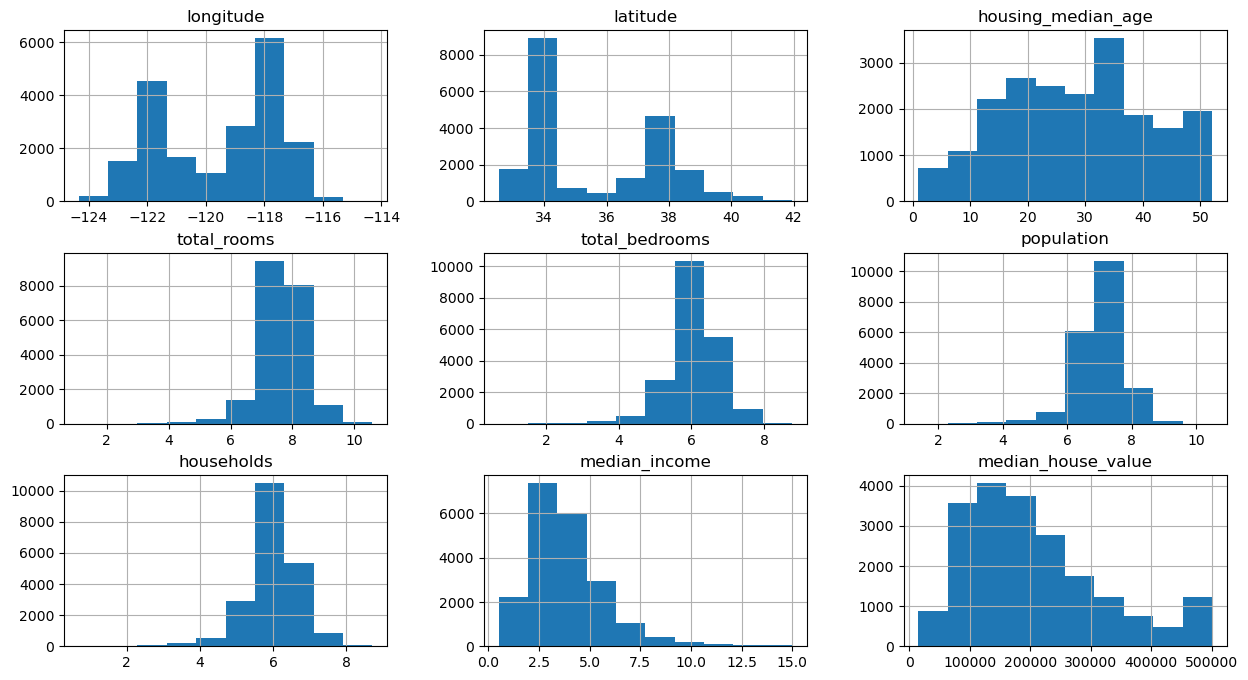

In [10]:
df.hist(figsize=(15, 8))

In [11]:
# Coorelation Matrix
df.corr()

C:\Users\AYANDWIP\AppData\Local\Temp\ipykernel_1784\1230310498.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000


C:\Users\AYANDWIP\AppData\Local\Temp\ipykernel_1784\937127417.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


<Axes: >

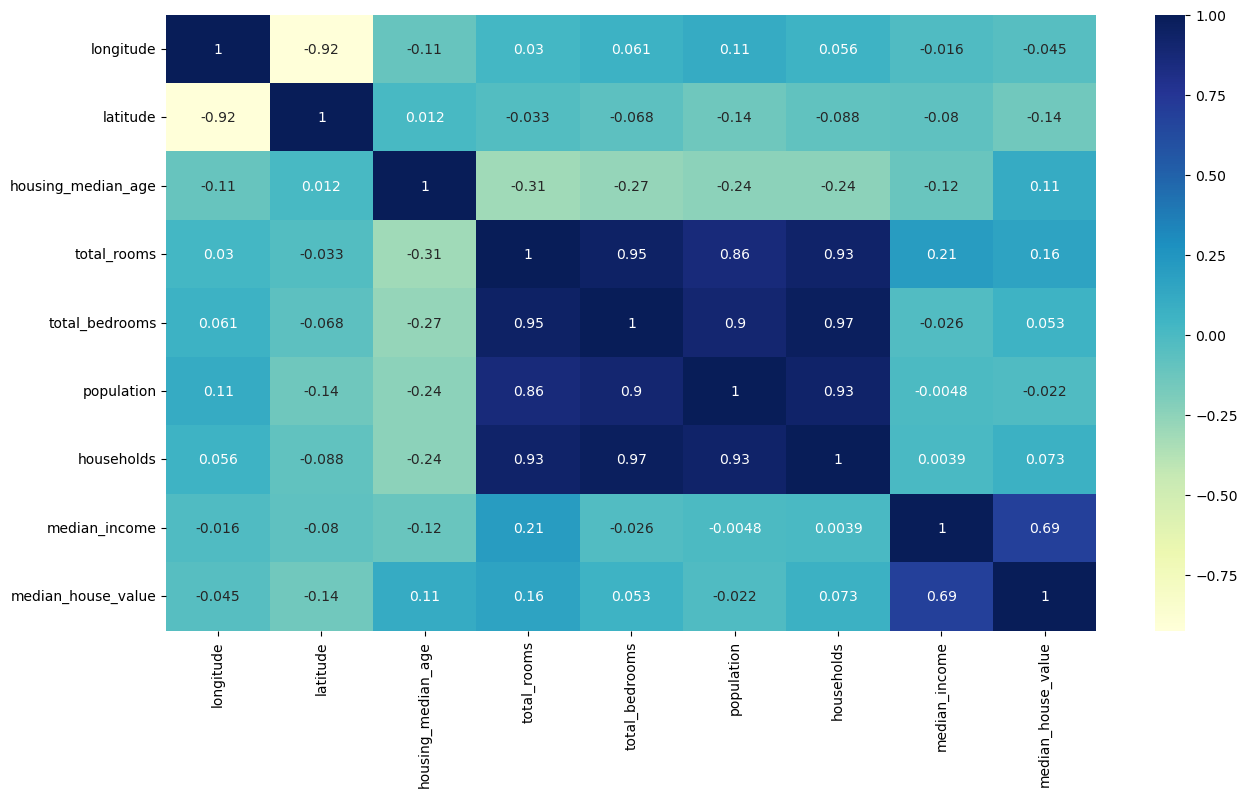

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [13]:
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,3
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,3
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,3
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,3
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,3


<Axes: >

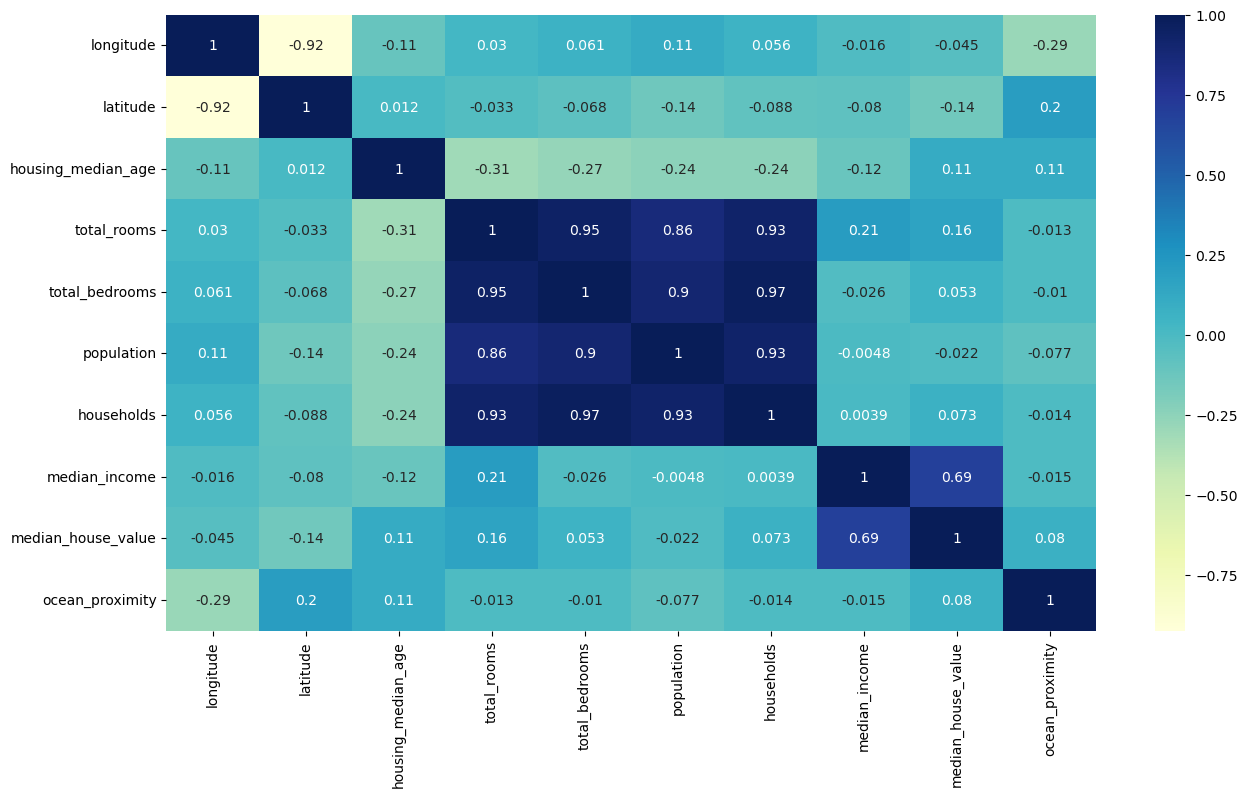

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

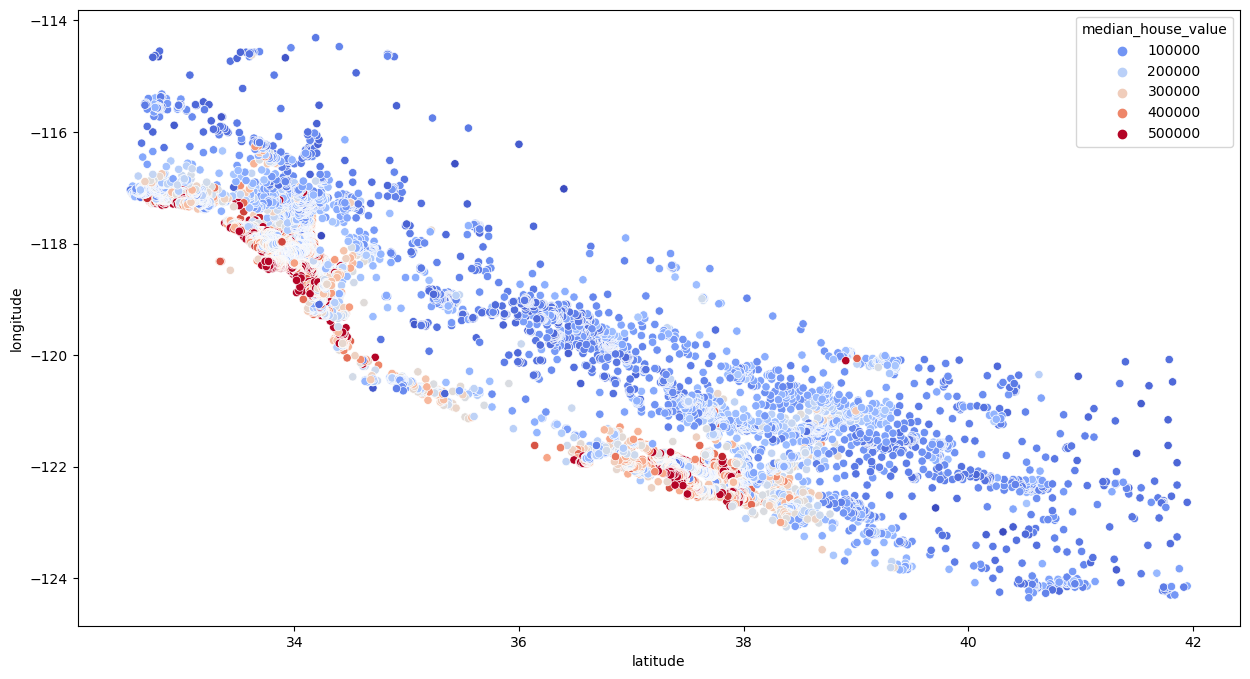

In [16]:
# scatterplot
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm")

In [17]:
# Addind new features
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
df['household_rooms'] = df['total_rooms'] / df['households']

In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,3,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,3,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,3,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,3,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,3,0.762444,1.329892


<Axes: >

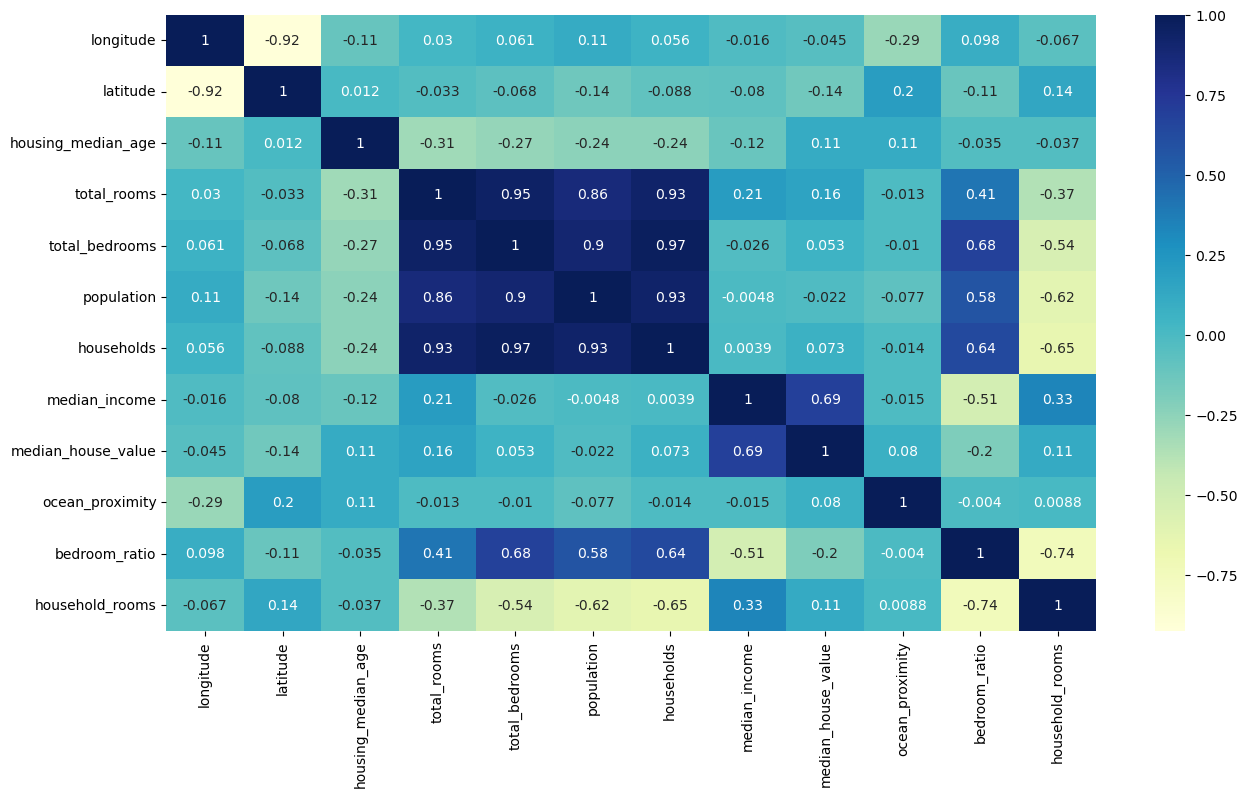

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [20]:
# Separating features and target
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [21]:
# preprocessing the data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [22]:
# Splitting the data into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2)

In [23]:
# train_data = X_train.join(y_train)
# test_data = X_test.join(y_test)

In [24]:
# Linear Regression
reg = LinearRegression()
# training the model
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
# make prediction
y_pred = reg.predict(X_test)

In [26]:
# accuracy of the model
reg.score(X_test, y_test)

0.6686168509082515